In [9]:
import os
import sys
import pandas as pd
import numpy as np

import tensorflow as tf
from IPython.display import Image
from tensorflow.keras.utils import plot_model

tf.__version__

'2.1.0-rc1'

In [3]:
# add project to the Pyithon path
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [4]:
from components.model import get_model

In [5]:
column_names = ["col_0","complaint_id","product","sub_product","issue","sub_issue","state","zip_code","date_received","date_sent_to_company","company","company_response","timely_response","consumer_disputed"]
feature_names = ["product", "sub_product", "issue", "sub_issue", "state", "zip_code", "company", "company_response", "timely_response", "consumer_disputed"]
cat_features = ["product", "sub_product", "state", "zip_code", "company_response", "timely_response", "consumer_disputed"]
text_features = ["issue", "sub_issue", "company",]
LABEL_COLUMN = 'consumer_disputed'

batch_size = 32
EVAL_SAMPLES = 2000

In [6]:
# load the dataset
def load_dataset(filename):
    df = pd.read_csv(filename, usecols=feature_names, na_values=0, keep_default_na=False)
    df.consumer_disputed.replace("", "No", inplace=True)

    for feature in cat_features:
        df[feature] = df[feature].astype("category").cat.codes

    for feature in text_features:
        df[feature] = df[feature].apply(lambda x: x.strip()).replace('', 'UNK')

    X = [pd.np.asarray(df[feature_name].values).reshape(-1) for feature_name in feature_names][:-1]
    y = np.asarray(df.pop("consumer_disputed"), dtype=np.uint8).reshape(-1)
    return X, y
 
X, y = load_dataset("../data/26k-consumer-complaints-modified.csv")


In [7]:

# def get_dataset(file_path, **kwargs):
#     dataset = tf.data.experimental.make_csv_dataset(
#         file_path,
#         column_names=column_names,
#         select_columns=feature_names,
#         batch_size=batch_size,
#         label_name=LABEL_COLUMN,
#         na_value="?",
#         num_epochs=1,
#         ignore_errors=True, 
#         **kwargs)
#     return dataset
# dataset = get_dataset("../data/26k-consumer-complaints-modified.csv")
# features, labels = next(iter(dataset))
# print(features)
# print(labels)

In [8]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
product_xf (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
sub_product_xf (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
state_xf (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
zip_code_xf (InputLayer)        [(None, 1)]          0                                            
______________________________________________________________________________________________

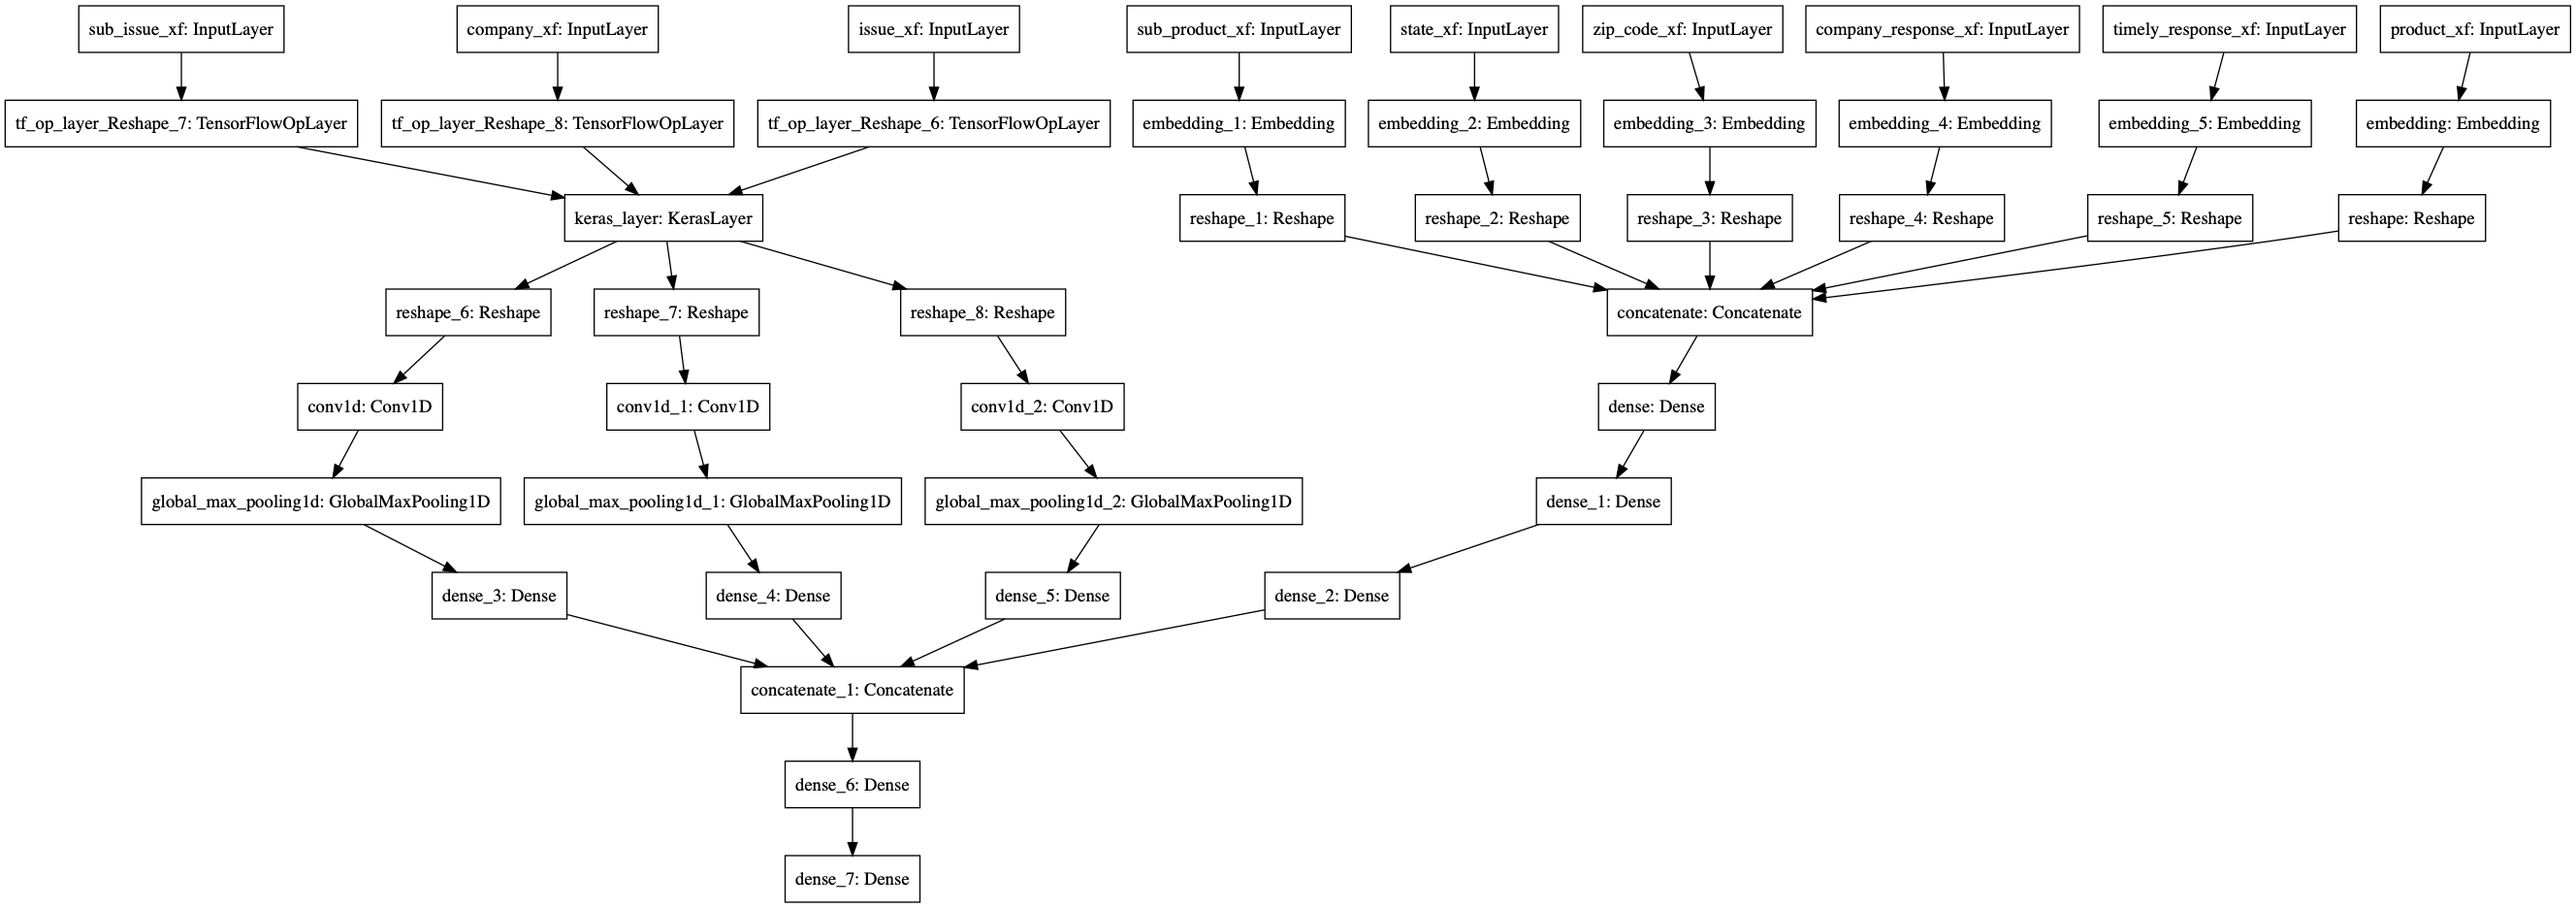

In [10]:
file_name = 
plot_model(model, to_file=file_name)
Image(filename=file_name)

In [9]:
model.fit(x=X, y=y, batch_size=batch_size, validation_split=0.25, epochs=4)

Train on 21117 samples, validate on 7039 samples
Epoch 1/4
21117/21117 [==============================] - 4s 208us/sample - loss: 0.4140 - accuracy: 0.8439 - true_positives: 0.0000e+00 - true_negatives: 17820.0000 - false_positives: 7.0000 - false_negatives: 3290.0000 - val_loss: 0.4933 - val_accuracy: 0.7986 - val_true_positives: 0.0000e+00 - val_true_negatives: 5621.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 1418.0000
Epoch 2/4
21117/21117 [==============================] - 2s 100us/sample - loss: 0.3943 - accuracy: 0.8442 - true_positives: 0.0000e+00 - true_negatives: 17827.0000 - false_positives: 0.0000e+00 - false_negatives: 3290.0000 - val_loss: 0.5019 - val_accuracy: 0.7986 - val_true_positives: 0.0000e+00 - val_true_negatives: 5621.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 1418.0000
Epoch 3/4
21117/21117 [==============================] - 2s 102us/sample - loss: 0.3767 - accuracy: 0.8455 - true_positives: 107.0000 - true_negatives: 17747.0